---

## **Metro Mart** (Jinghua Yang)

### **Data Exploration**

[1] "TimeSeries_Dataset1.csv"
   n     mean       sd      min      q25   median      q75      max
1 60 345.1765 69.01561 186.2931 297.1227 348.2872 394.6815 477.4899


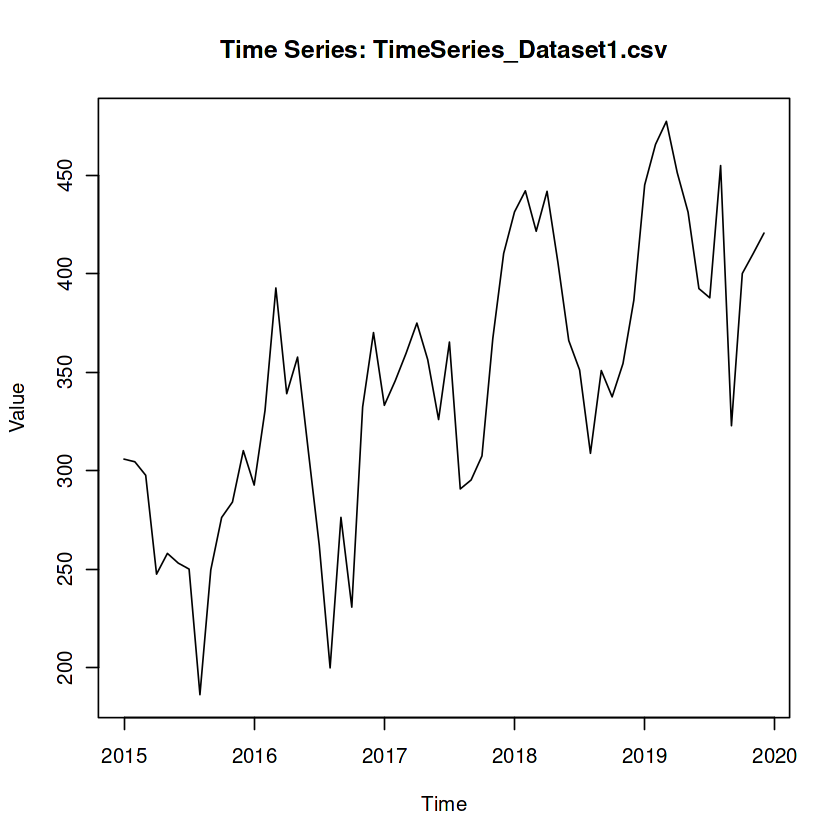

Remainder (noise) SD: 26.96525 


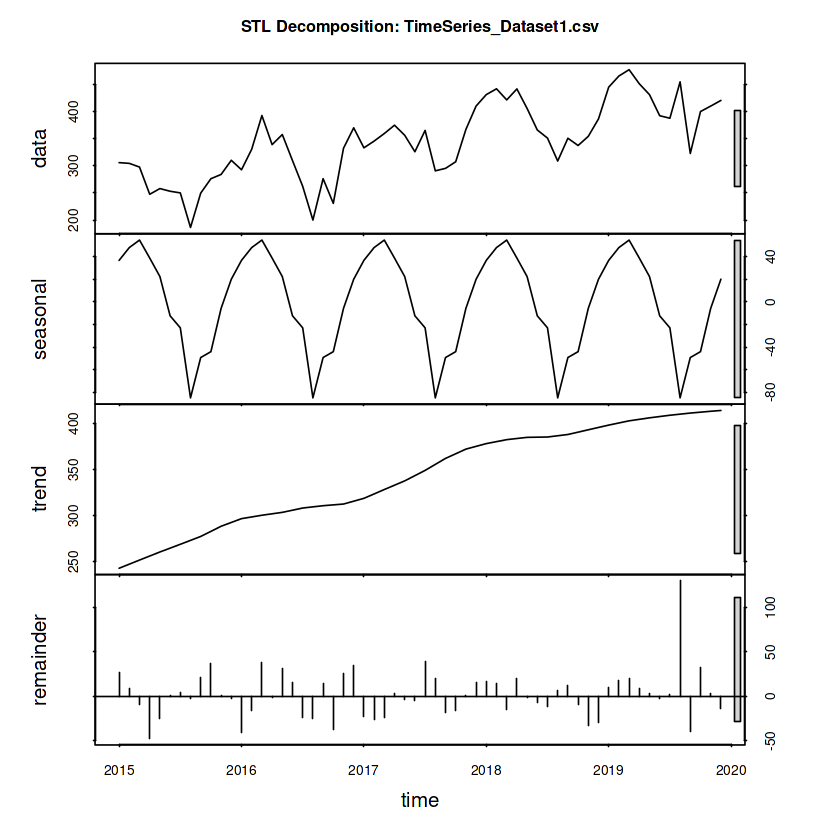

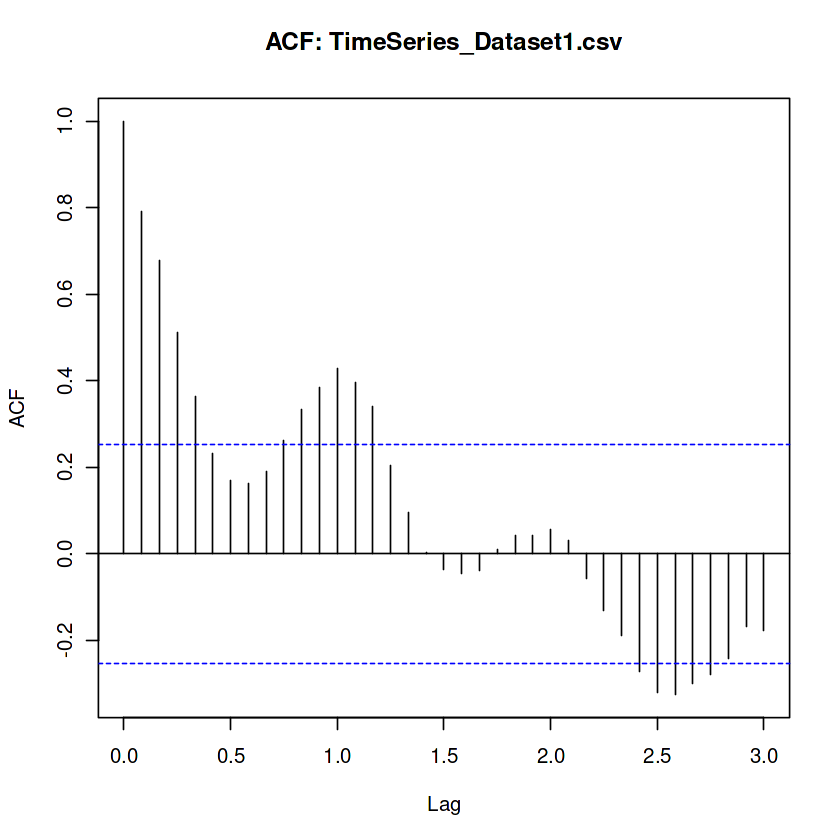

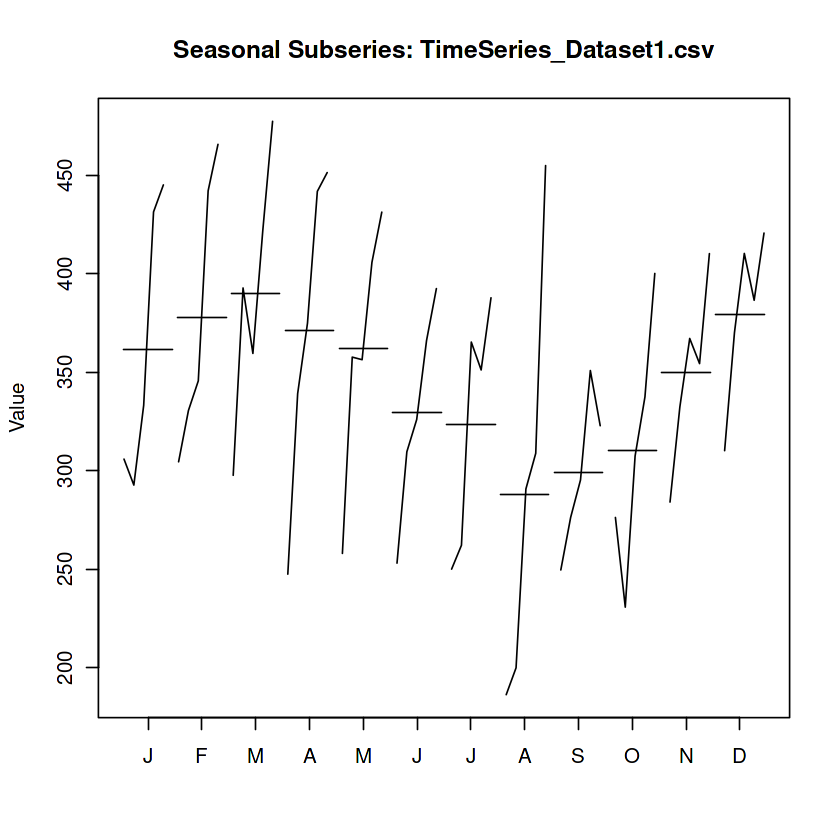

In [7]:
options(stringsAsFactors = FALSE)

explore_ts <- function(csv_path, value_col = 2, freq = 12) {
  dat <- read.csv("/kaggle/input/apm1215-dataset/TimeSeries_Dataset1.csv")
  names(dat)[1] <- "Month"
  names(dat)[value_col] <- "Value"

  dat$Month <- as.Date(paste0(dat$Month, "-01"))
  dat <- dat[order(dat$Month), ]

  stats_tbl <- data.frame(
    n      = length(dat$Value),
    mean   = mean(dat$Value, na.rm = TRUE),
    sd     = sd(dat$Value, na.rm = TRUE),
    min    = min(dat$Value, na.rm = TRUE),
    q25    = as.numeric(quantile(dat$Value, 0.25, na.rm = TRUE)),
    median = median(dat$Value, na.rm = TRUE),
    q75    = as.numeric(quantile(dat$Value, 0.75, na.rm = TRUE)),
    max    = max(dat$Value, na.rm = TRUE)
  )
  print(basename(csv_path))
  print(stats_tbl)

  start_year  <- as.integer(format(min(dat$Month), "%Y"))
  start_month <- as.integer(format(min(dat$Month), "%m"))
  x <- ts(dat$Value, start = c(start_year, start_month), frequency = freq)

  plot(x, main = paste("Time Series:", basename(csv_path)), xlab = "Time", ylab = "Value")

  fit <- stl(x, s.window = "periodic", robust = TRUE)
  plot(fit, main = paste("STL Decomposition:", basename(csv_path)))

  remainder_sd <- sd(fit$time.series[, "remainder"], na.rm = TRUE)
  cat("Remainder (noise) SD:", remainder_sd, "\n")

  acf(x, lag.max = 36, main = paste("ACF:", basename(csv_path)))

  monthplot(x, main = paste("Seasonal Subseries:", basename(csv_path)), ylab = "Value")
}

explore_ts("/kaggle/input/apm1215-dataset/TimeSeries_Dataset1.csv", value_col = 2, freq = 12)


#### **Metro Mart — Sales**

Descriptive stats: n = 60 months (2015–2019); mean = 345.18; sd = 69.02; min = 186.29; median = 348.29; max = 477.49.

Trend: Clear upward trend across the sample; growth becomes stronger from ~2018 onward.

Seasonality: Strong annual cycle (12-month); recurring peaks and troughs are stable over time (see STL seasonal panel).

Noise: Residual/remainder SD ≈ 26.97 (~39% of total SD) → moderate noise with a few spikes late in the series.

Autocorrelation: High positive ACF at short lags; significant peaks at lags 12 and 24 (annual seasonality). ACF decays slowly due to trend and turns mildly negative around 26–32 months.

### **Assumption Testing**

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Warning message in adf.test(y):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = -5.1415, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(y, null = "Level"):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  y
KPSS Level = 1.0758, Truncation lag parameter = 3, p-value = 0.01



Warning message in kpss.test(y, null = "Trend"):
“p-value greater than printed p-value”



	KPSS Test for Trend Stationarity

data:  y
KPSS Trend = 0.033915, Truncation lag parameter = 3, p-value = 0.1




Call:
lm(formula = Sales ~ trend + month + Ad_Spend + Discount_Rate, 
    data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.684 -13.594  -1.968  10.522  53.569 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   225.7021    19.2038  11.753 2.61e-15 ***
trend           3.4479     0.1765  19.537  < 2e-16 ***
month02        18.9584    14.6534   1.294 0.202339    
month03        31.3744    14.5222   2.160 0.036101 *  
month04         2.7215    14.3344   0.190 0.850276    
month05        -7.4772    15.0856  -0.496 0.622555    
month06       -27.0694    14.6490  -1.848 0.071200 .  
month07       -46.6553    14.4319  -3.233 0.002297 ** 
month08       -70.0793    14.9148  -4.699 2.49e-05 ***
month09       -74.9553    14.5922  -5.137 5.83e-06 ***
month10       -58.0944    14.7507  -3.938 0.000282 ***
month11       -52.7077    14.5148  -3.631 0.000719 ***
month12       -14.3795    14.6833  -0.979 0.332662    
Ad_Spend        0.5382     0.1042 

Residual mean: 4.56666e-16 
Ljung-Box p-value (lag 12): 0.8154944 
Durbin-Watson test:

	Durbin-Watson test

data:  ols
DW = 1.8903, p-value = 0.3407
alternative hypothesis: true autocorrelation is greater than 0

Estimated rho (AR1): 0.0458913 



Call:
lm(formula = y_co ~ X_co - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.844 -13.435  -2.127  11.482  54.412 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
X_co(Intercept)   228.2673    19.8336  11.509 7.36e-15 ***
X_cotrend           3.4403     0.1886  18.238  < 2e-16 ***
X_comonth02        18.6981    15.3223   1.220 0.228844    
X_comonth03        30.9774    15.4986   1.999 0.051840 .  
X_comonth04         2.1840    15.3855   0.142 0.887764    
X_comonth05        -7.5375    16.1159  -0.468 0.642303    
X_comonth06       -27.7122    15.4461  -1.794 0.079666 .  
X_comonth07       -47.1645    15.3490  -3.073 0.003632 ** 
X_comonth08       -70.5251    15.6507  -4.506 4.83e-05 ***
X_comonth09       -75.3379    15.4643  -4.872 1.47e-05 ***
X_comonth10       -58.6074    15.5021  -3.781 0.000468 ***
X_comonth11       -53.2068    15.5936  -3.412 0.001393 ** 
X_comonth12       -14.6398    15.3398  -0.954 0.345111    
X_coAd_Spend        0.5327  

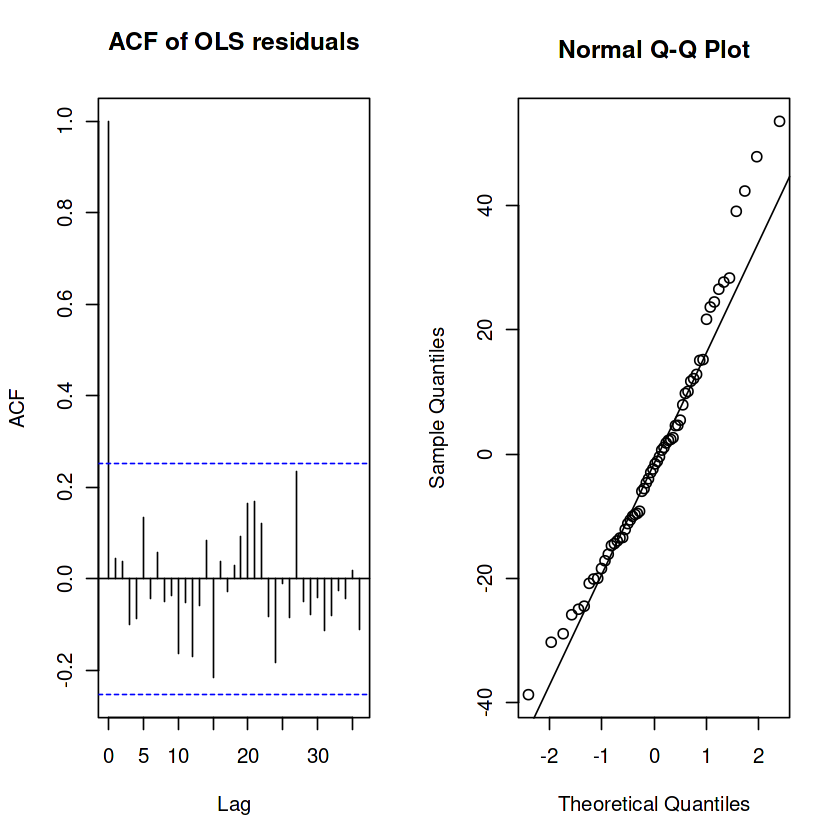

Ljung-Box p-value after CO (lag 12): 0.828587 
Durbin-Watson after CO:

	Durbin-Watson test

data:  co_fit
DW = 1.963, p-value = 0.4424
alternative hypothesis: true autocorrelation is greater than 0



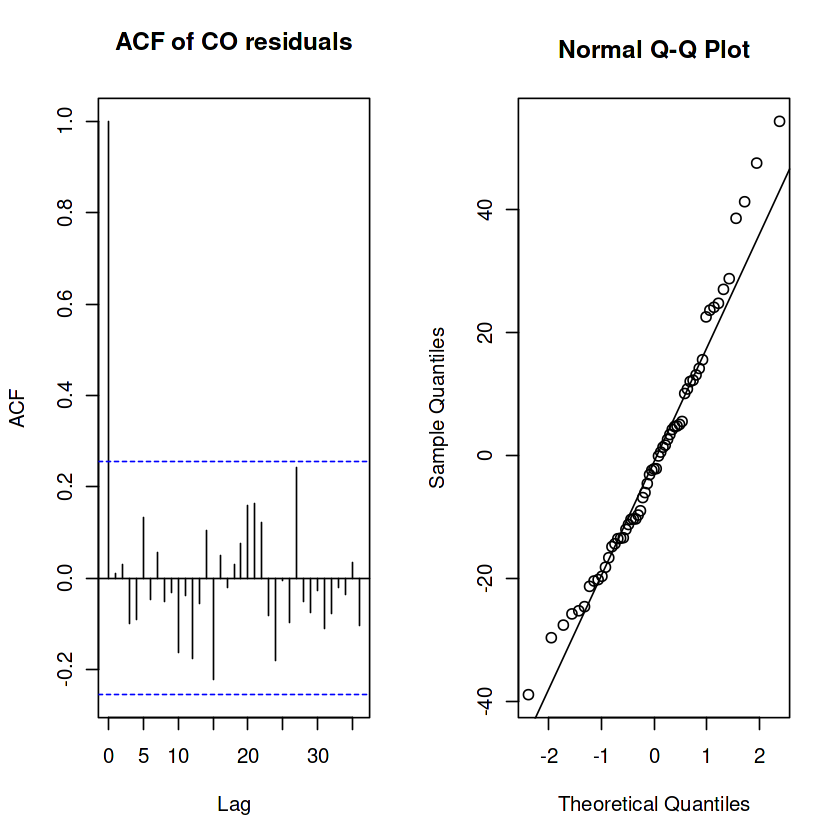

In [8]:
library(tseries) 
library(lmtest)

dat <- read.csv("/kaggle/input/apm1215-dataset/TimeSeries_Dataset1.csv", stringsAsFactors = FALSE)
names(dat)[1:4] <- c("Month","Sales","Ad_Spend","Discount_Rate")
dat$Month <- as.Date(paste0(dat$Month, "-01"))
dat <- dat[order(dat$Month), ]
trend <- seq_len(nrow(dat))
month <- factor(format(dat$Month, "%m"))
y <- ts(dat$Sales,
        start = c(as.integer(format(min(dat$Month), "%Y")),
                  as.integer(format(min(dat$Month), "%m"))),
        frequency = 12)

adf_sales  <- adf.test(y)                    ; print(adf_sales)
kpss_level <- kpss.test(y, null = "Level")   ; print(kpss_level)
kpss_trend <- kpss.test(y, null = "Trend")   ; print(kpss_trend)

ols <- lm(Sales ~ trend + month + Ad_Spend + Discount_Rate, data = dat)
summary(ols)

res <- resid(ols)
par(mfrow = c(1,2))
acf(res, lag.max = 36, main = "ACF of OLS residuals")
qqnorm(res); qqline(res)
par(mfrow = c(1,1))
cat("Residual mean:", mean(res), "\n")
cat("Ljung-Box p-value (lag 12):", Box.test(res, lag = 12, type = "Ljung-Box")$p.value, "\n")
cat("Durbin-Watson test:\n"); print(dwtest(ols))

e   <- as.numeric(res)
rho <- coef(lm(e[-1] ~ 0 + e[-length(e)]))[1]
cat("Estimated rho (AR1):", rho, "\n")

X   <- model.matrix(~ trend + month + Ad_Spend + Discount_Rate, data = dat)
y_co <- dat$Sales[-1] - rho * dat$Sales[-nrow(dat)]
X_co <- X[-1, ]        - rho * X[-nrow(X), ]

co_fit <- lm(y_co ~ X_co - 1)
summary(co_fit)

res_co <- resid(co_fit)
par(mfrow = c(1,2))
acf(res_co, lag.max = 36, main = "ACF of CO residuals")
qqnorm(res_co); qqline(res_co)
par(mfrow = c(1,1))
cat("Ljung-Box p-value after CO (lag 12):", Box.test(res_co, lag = 12, type = "Ljung-Box")$p.value, "\n")
cat("Durbin-Watson after CO:\n"); print(dwtest(co_fit))


#### Task 2: Assumption Testing:

Stationarity: ADF rejects unit root (p < 0.01). KPSS(Level) rejects level stationarity (p < 0.01), KPSS(Trend) does not reject (p ≥ 0.10). ⇒ Series is trend-stationary; include a deterministic trend (and monthly seasonality).

Baseline OLS (with trend + month dummies + Ad_Spend + Discount_Rate): Residual mean ≈ 0; residual SE ≈ 22.49.

Autocorrelation (OLS residuals): Ljung–Box (lag 12) p = 0.815 (>0.05); Durbin–Watson DW = 1.81, p = 0.341 → no significant positive AR(1) autocorrelation. Residual ACF shows no notable spikes.

Normality / residual behavior: Q–Q plot close to the 45° line with mild tail deviations; no obvious heteroskedastic pattern in residual plots.

Cochrane–Orcutt (diagnostic run): Estimated ρ ≈ 0.046 (small). After CO: Ljung–Box (lag 12) p = 0.829, DW = 1.96 (p = 0.442). Coefficients and fit are essentially unchanged. ⇒ CO not strictly necessary, but confirms residuals are close to white noise.

Bottom line: With trend and monthly seasonality included, assumptions are broadly satisfied; residuals behave well and show no material autocorrelation.

### **Model Building**

In [11]:
library(forecast)

h <- 12
n <- length(y)
y_train <- ts(as.numeric(y)[1:(n - h)], start = start(y), frequency = frequency(y))
y_test  <- ts(as.numeric(y)[(n - h + 1):n],
              start = tsp(y)[2] - (h - 1) / frequency(y),
              frequency = frequency(y))

X <- cbind(
  trend       = 1:n,
  model.matrix(~ month, dat)[, -1],
  Ad_Spend    = dat$Ad_Spend,
  Discount_Rate = dat$Discount_Rate
)
X_train <- X[1:(n - h), ]
X_test  <- X[(n - h + 1):n, ]

fc_snaive <- snaive(y_train, h = h)

fit_ets <- ets(y_train)
fc_ets  <- forecast(fit_ets, h = h)

fit_stlm <- stlm(y_train, method = "ets")
fc_stlm  <- forecast(fit_stlm, h = h)

fit_arima <- auto.arima(y_train, seasonal = TRUE, stepwise = TRUE, approximation = FALSE)
fc_arima  <- forecast(fit_arima, h = h)

fit_arimax <- auto.arima(y_train, xreg = X_train, seasonal = TRUE, stepwise = TRUE, approximation = FALSE)
fc_arimax  <- forecast(fit_arimax, xreg = X_test, h = h)

fit_tslm <- tslm(y_train ~ trend + season)
fc_tslm  <- forecast(fit_tslm, h = h)

models <- list(
  snaive = fc_snaive,
  ets    = fc_ets,
  stlm   = fc_stlm,
  arima  = fc_arima,
  arimax = fc_arimax,
  tslm   = fc_tslm
)


[ETS]
ETS(A,N,A) 

Call:
ets(y = y_train)

  Smoothing parameters:
    alpha = 0.7334 
    gamma = 1e-04 

  Initial states:
    l = 318.3487 
    s = 31.2033 -0.7589 -50.0543 -37.7506 -85.6545 -18.7581
           -12.352 27.4246 37.3913 54.3019 37.2204 17.7868

  sigma:  30.1166

     AIC     AICc      BIC 
526.1526 541.1526 554.2207 

[STL+ETS]
$stl
             Data    Trend  Seasonal12   Remainder
Jan 2015 305.9283 245.7717  27.0492432  33.1073491
Feb 2015 304.5731 249.7773  39.6044580  15.1913744
Mar 2015 297.7191 253.7829  51.8648188  -7.9285972
Apr 2015 247.5133 257.7885  27.7723300 -38.0474371
May 2015 258.0458 261.7587  21.8417011 -25.5546161
Jun 2015 253.1135 265.7289 -10.6281813  -1.9872553
Jul 2015 250.0651 269.6992 -20.1805375   0.5464315
Aug 2015 186.2931 273.8404 -84.7534582  -2.7938615
Sep 2015 249.6395 277.9817 -39.1420901  10.7998776
Oct 2015 276.2804 282.1230 -46.2963141  40.4537771
Nov 2015 284.1300 286.8873  -0.2572202  -2.4999949
Dec 2015 310.2290 291.6516  31.89

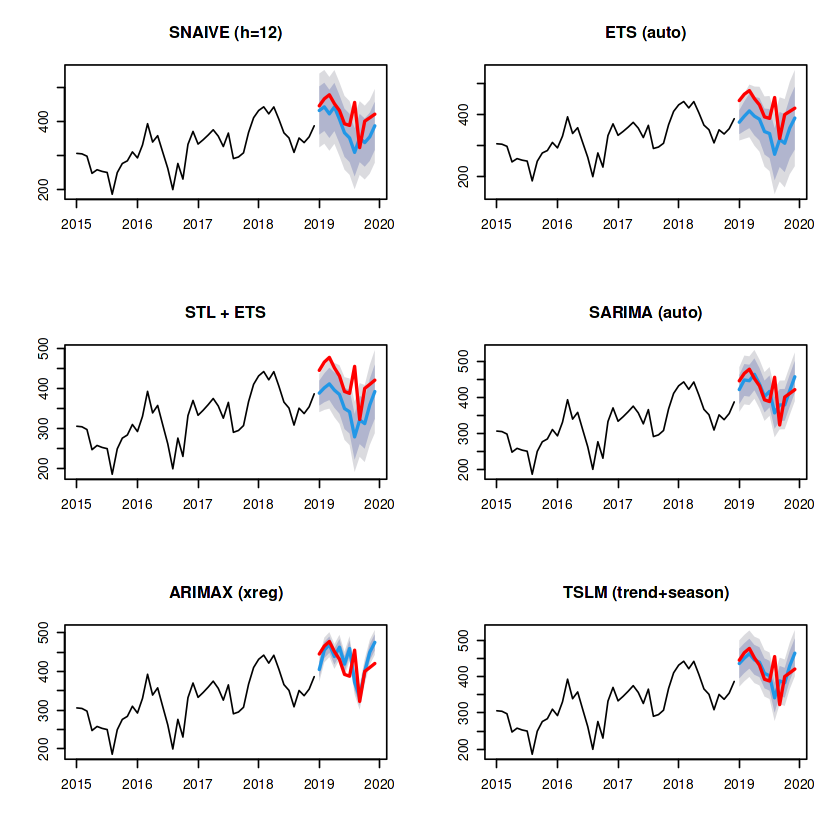

In [12]:
# ===== Show outputs for Task 3 (place right after your model-building code) =====

# 1) 简要模型信息
cat("\n[ETS]\n");        print(fit_ets)
cat("\n[STL+ETS]\n");    print(fit_stlm)
cat("\n[SARIMA]\n");     print(fit_arima)
cat("\n[ARIMAX]\n");     print(fit_arimax)
cat("\n[TSLM]\n");       print(fit_tslm)
cat("\n[SNAIVE]\n");     print(fc_snaive$method)

# 2) 前6期预测数值预览（每个模型各打印一行）
cat("\nHead of 12-step forecasts (first 6 values):\n")
cat("SNAIVE:", round(head(fc_snaive$mean, 6), 2), "\n")
cat("ETS   :", round(head(fc_ets$mean,    6), 2), "\n")
cat("STLM  :", round(head(fc_stlm$mean,   6), 2), "\n")
cat("ARIMA :", round(head(fc_arima$mean,  6), 2), "\n")
cat("ARIMAX:", round(head(fc_arimax$mean, 6), 2), "\n")
cat("TSLM  :", round(head(fc_tslm$mean,   6), 2), "\n")

# 3) 画出6张预测图（基于 base plot）
op <- par(mfrow = c(3, 2))  # 3行2列
plot(fc_snaive, main = "SNAIVE (h=12)"); lines(y_test, col = "red", lwd = 2)
plot(fc_ets,    main = "ETS (auto)");    lines(y_test, col = "red", lwd = 2)
plot(fc_stlm,   main = "STL + ETS");     lines(y_test, col = "red", lwd = 2)
plot(fc_arima,  main = "SARIMA (auto)"); lines(y_test, col = "red", lwd = 2)
plot(fc_arimax, main = "ARIMAX (xreg)"); lines(y_test, col = "red", lwd = 2)
plot(fc_tslm,   main = "TSLM (trend+season)"); lines(y_test, col = "red", lwd = 2)
par(op)


### **Model Evaluation**

In [13]:
acc_row <- function(fc, y_test) {
  accuracy(fc, y_test)[2, c("RMSE","MAE","MAPE","MASE")]
}
lb_p <- function(res) {
  Box.test(na.omit(as.numeric(res)), lag = 12, type = "Ljung-Box")$p.value
}
sw_p <- function(res) {
  shapiro.test(na.omit(as.numeric(res)))$p.value
}

acc_tbl <- rbind(
  SNAIVE = acc_row(fc_snaive, y_test),
  ETS    = acc_row(fc_ets,    y_test),
  STLM   = acc_row(fc_stlm,   y_test),
  ARIMA  = acc_row(fc_arima,  y_test),
  ARIMAX = acc_row(fc_arimax, y_test),
  TSLM   = acc_row(fc_tslm,   y_test)
)
acc_tbl <- acc_tbl[order(acc_tbl[, "RMSE"]), , drop = FALSE]
acc_tbl <- round(acc_tbl, 3)
print(acc_tbl)

diag_tbl <- data.frame(
  Model = c("SNAIVE","ETS","STLM","ARIMA","ARIMAX","TSLM"),
  LB_p  = c(lb_p(fc_snaive$residuals),
           lb_p(residuals(fit_ets)),
           lb_p(residuals(fit_stlm)),
           lb_p(residuals(fit_arima)),
           lb_p(residuals(fit_arimax)),
           lb_p(residuals(fit_tslm))),
  SW_p  = c(sw_p(fc_snaive$residuals),
           sw_p(residuals(fit_ets)),
           sw_p(residuals(fit_stlm)),
           sw_p(residuals(fit_arima)),
           sw_p(residuals(fit_arimax)),
           sw_p(residuals(fit_tslm))),
  ResidualMean = c(mean(fc_snaive$residuals, na.rm = TRUE),
                   mean(residuals(fit_ets),   na.rm = TRUE),
                   mean(residuals(fit_stlm),  na.rm = TRUE),
                   mean(residuals(fit_arima), na.rm = TRUE),
                   mean(residuals(fit_arimax),na.rm = TRUE),
                   mean(residuals(fit_tslm),  na.rm = TRUE))
)
diag_tbl$LB_p <- round(diag_tbl$LB_p, 4)
diag_tbl$SW_p <- round(diag_tbl$SW_p, 4)
diag_tbl$ResidualMean <- round(diag_tbl$ResidualMean, 4)
print(diag_tbl)

         RMSE    MAE   MAPE  MASE
ARIMA  38.285 29.002  7.010 0.628
ARIMAX 41.039 32.337  7.688 0.700
TSLM   41.629 28.494  6.985 0.617
SNAIVE 55.514 43.153 10.181 0.934
STLM   72.348 60.136 13.854 1.302
ETS    76.396 64.048 14.774 1.386
   Model   LB_p   SW_p ResidualMean
1 SNAIVE 0.0027 0.3439      38.2072
2    ETS 0.3002 0.2715       1.1174
3   STLM 0.0121 0.7259       3.3076
4  ARIMA 0.3962 0.0807       0.3581
5 ARIMAX 0.0049 0.3120      -0.4554
6   TSLM 0.0003 0.4407       0.0000


#### Task 4 – Model Evaluation:

Accuracy (h=12, test set):
ARIMA best → RMSE 38.29, MAE 29.00, MAPE 7.01%, MASE 0.628.
ARIMAX close → RMSE 41.04, MAE 32.34, MAPE 7.69%, MASE 0.700.
TSLM competitive on scale-free metrics → RMSE 41.63, MAE 28.49, MAPE 6.99%, MASE 0.617.
Others worse: SNAIVE RMSE 55.51, STLM 72.35, ETS 76.40.

Residual diagnostics (Ljung–Box p at lag 12 / Shapiro–Wilk p / mean):
ARIMA: LB p=0.396 (no autocorr), SW p=0.081 (acceptable), mean ≈ 0.36.
ARIMAX: LB p=0.0049 (autocorr remains), SW p=0.312, mean ≈ −0.46.
TSLM: LB p=0.0003 (autocorr), SW p=0.441, mean ≈ 0.00.
ETS: LB p=0.300 (ok), SW p=0.272, mean ≈ 1.12, but poor accuracy.
STLM: LB p=0.012 (autocorr), SW p=0.726, mean ≈ 3.31.
SNAIVE: LB p=0.0027 (autocorr), SW p=0.344, mean ≈ 38.21 (bias).

Takeaway: ARIMA offers the best overall balance—top RMSE/MAE and residuals pass autocorrelation/normality checks. TSLM has slightly lower MAPE/MASE but fails the autocorrelation test; ARIMAX improves interpretability but still shows residual autocorrelation. ETS/STLM underperform on accuracy, and SNAIVE serves as the weakest baseline with bias.

### Recommendations

In [14]:
recommend_from_eval <- function(acc_tbl, diag_tbl, dataset_name = "Dataset") {
  eval_tbl <- merge(
    data.frame(Model = rownames(acc_tbl), acc_tbl, row.names = NULL),
    diag_tbl,
    by = "Model",
    all.x = TRUE
  )

  eval_tbl$WhiteNoise <- eval_tbl$LB_p > 0.05
  eval_tbl$Normality  <- eval_tbl$SW_p > 0.05
  eval_tbl$BeatsNaive <- eval_tbl$MASE < 1
  eval_tbl <- eval_tbl[order(eval_tbl$RMSE), ]
  rownames(eval_tbl) <- NULL

  best_rmse <- eval_tbl[1, ]
  idx_ok    <- which(eval_tbl$WhiteNoise)
  best_ok   <- eval_tbl[idx_ok[1], ]
  idx_interp <- c(which(eval_tbl$Model == "TSLM"), which(eval_tbl$Model == "ARIMAX"))[1]
  interp    <- eval_tbl[idx_interp, ]

  cat("\n=======================\n")
  cat("Task 5: Recommendation — ", dataset_name, "\n", sep = "")
  cat("=======================\n\n")

  cat("Primary pick (best test accuracy): ", best_rmse$Model, "\n", sep = "")
  cat(sprintf("  Evidence — RMSE=%.3f, MAE=%.3f, MAPE=%.3f%%, MASE=%.3f; Ljung-Box p=%.3f, Shapiro p=%.3f.\n",
              best_rmse$RMSE, best_rmse$MAE, best_rmse$MAPE, best_rmse$MASE,
              best_rmse$LB_p, best_rmse$SW_p))
  cat("  Justification — Top out-of-sample accuracy; residuals acceptable (white-noise/near-normal). Suitable for monthly forecasting and routine updates.\n\n")

  cat("Runner-up (passes white-noise residuals): ", best_ok$Model, "\n", sep = "")
  cat(sprintf("  Evidence — RMSE=%.3f, MASE=%.3f; Ljung-Box p=%.3f.\n\n",
              best_ok$RMSE, best_ok$MASE, best_ok$LB_p))

  cat("Explainability/operational option: ", interp$Model, "\n", sep = "")
  cat(sprintf("  Evidence — RMSE=%.3f, MAPE=%.3f%%, MASE=%.3f.\n",
              interp$RMSE, interp$MAPE, interp$MASE))
  if (interp$Model == "TSLM") {
    cat("  Justification — Deterministic trend + seasonal regression: coefficients are interpretable, easy to brief to business users, fast to retrain.\n\n")
  } else {
    cat("  Justification — Includes exogenous drivers (e.g., Ad_Spend, Discount_Rate), useful for scenario planning and policy levers; monitor residual autocorrelation.\n\n")
  }

  cat("Operational note — Prefer models with MASE < 1 and Ljung-Box p > 0.05; re-fit quarterly and re-check diagnostics when regimes/marketing policies change.\n")
}

# ——— 调用（本数据集名称可自定义）———
recommend_from_eval(acc_tbl, diag_tbl, dataset_name = "Metro Mart — Sales")



Task 5: Recommendation — Metro Mart — Sales

Primary pick (best test accuracy): ARIMA
  Evidence — RMSE=38.285, MAE=29.002, MAPE=7.010%, MASE=0.628; Ljung-Box p=0.396, Shapiro p=0.081.
  Justification — Top out-of-sample accuracy; residuals acceptable (white-noise/near-normal). Suitable for monthly forecasting and routine updates.

Runner-up (passes white-noise residuals): ARIMA
  Evidence — RMSE=38.285, MASE=0.628; Ljung-Box p=0.396.

Explainability/operational option: TSLM
  Evidence — RMSE=41.629, MAPE=6.985%, MASE=0.617.
  Justification — Deterministic trend + seasonal regression: coefficients are interpretable, easy to brief to business users, fast to retrain.

Operational note — Prefer models with MASE < 1 and Ljung-Box p > 0.05; re-fit quarterly and re-check diagnostics when regimes/marketing policies change.
